In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def load_data(filepath):
    """Loads a dataset as pandas dataframe
    INPUTS:
        filepath > path to the file to be loaded
    OUTPUT:
        df > a pandas dataframe
        
    """
    df = pd.read_csv(filepath)
    return df


df = load_data('GDI.csv')
df.head()

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"


### Data understanding  

* 190 rows of data 
* 14 features
* 2 missing values
* 21 countries have 

#### Features

1. HDI Rank
2. Country
3. GDI_Value
4. GDI_Group
5. HDI_Female
6. HDI_Male
7. Lif_Expec_Female - Life Expectancy of Females
8. Lif_Excep_Male   - Life Expectancy of Males
9. Excep_Yrs_Schooling_Female - Expected years of schooling 
10. Excep_Yrs_Schooling_Male - Expected years of schooling 
11. Mean_Yrs_Schooling_Female - Mean years of schooling 
12. Mean_Yrs_Schooling_Male -  Mean years of schooling 
13. GNI_PC_Female  - Gross National Income Female
14. GNI_PC_Male    - Gross National Income Male

#### Countries without GDI values for the year under review
1. Liechtenstein
2. Andorra
3. Palau
4. Bahamas
5. Seychelles
6. Grenada
7. Saint Kitts and Nevis
8. Antigua and Barbuda
9. Fiji
10.  Dominica
11. Samoa
12. Marshall Islands
13. Kiribati
14. Micronesia (Federated States of)
15. Vanuatu
16. Solomon Islands
17. Papua New Guinea
18. Djibouti
19. Guinea-Bissau 
20. Eritrea
21. Equatorial Guinea
22. Turkmenistan


###  Data Preparation/Cleaning:
The following data preparation steps are taken:

* Drop First Row for it has 2 missing values and other columns have year 2019 as values
* Drop rows with undefined GDI_Value 
* Remove the commas ',' in GNI_PC_Female, GNI_PC_Male and HDI Rank columns
* Rename 'Lif_Expec_Female' and 'Lif_Excep_Male' columns
* Change all the non-textual columns to numerical data types


In [15]:
def prepare_data(df):
    """
    Clean and prepare data for analysis and visualizations
    INPUT:
        df --> uncleaned dataframe
    RETURNS:
        df --> cleaned dataframe
    """
    # Make a copy of df
    df = df.copy()
    df =df.drop([0])
    # Drop rows with undefined GDI_Value 
    df = df.drop(df[df['GDI_Value'] =='..'].index)
    # Remove ',' form GNI_PC
    df['GNI_PC_Female'] = df['GNI_PC_Female'].str.replace(',','')
    df['GNI_PC_Male'] = df['GNI_PC_Male'].str.replace(',','')
    
    # Rename some columns
    df = df.rename(columns = {'Lif_Expec_Female' : 'Life_Expectancy_Female', 
                              'Lif_Excep_Male': 'Life_Expectancy_Male',
                         'HDI Rank':'HDI_Rank'})
    # Change all the non-textual columns to numerical data types
    columns = ['GDI_Value', 'GDI_Group', 'HDI_Female',  'HDI_Male', 'Life_Expectancy_Female', 
           'Life_Expectancy_Male','Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
           'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
           'GNI_PC_Male']
    for col in columns:
        df[col] = df[col].astype('float')
    df['HDI_Rank'] = df['HDI_Rank'].astype('int')
    
   
    return df


    
    

In [16]:
df = prepare_data(df)

In [4]:
# Countries with undefined GDI_Value 
df[df['GDI_Value'] =='..']['Country'].values


array(['Liechtenstein', 'Andorra', 'Palau', 'Bahamas', 'Seychelles',
       'Grenada', 'Saint Kitts and Nevis', 'Antigua and Barbuda', 'Fiji',
       'Dominica', 'Samoa', 'Turkmenistan', 'Marshall Islands',
       'Kiribati', 'Micronesia (Federated States of)', 'Vanuatu',
       'Equatorial Guinea', 'Solomon Islands', 'Papua New Guinea',
       'Djibouti', 'Guinea-Bissau', 'Eritrea'], dtype=object)

In [7]:
d = df.sort_values(by = 'GDI_Value')
d.head(3)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
179,179.0,Yemen,0.488,5,0.270,0.553,67.8,64.4,7.4,10.2,2.9,5.1,186,"2,980"
169,169.0,Afghanistan,0.659,5,0.391,0.593,66.4,63.4,7.7,12.5,1.9,6.0,819,"3,566"
189,189.0,Niger,0.724,5,0.321,0.443,63.6,61.3,5.7,7.2,1.4,2.8,536,"1,859"


In [74]:
def plot_hdi_gdi(df, num=10, top=1):
    """Plot of num Countries with highest or least GDIs with their HDIs"""
    if top ==1:
        df = df[(df.GDI_Value>=1) & (df.HDI_Male>=0.8)]
        df = df.sort_values(by='GDI_Value', ascending=False).head(num)
        #num = df.shape[0]
        title = f"Top {num} Countries in Gender Development Index and their HDIs"
    elif top==2:
        df = df[(df.GDI_Value>=0.7) & (df.HDI_Male <= 0.5)]
        title = f"{num} Countries with High GDIs and Low HDIs"
        
    else:
        df = df.sort_values(by='GDI_Value').head(num)
        title = f"{num} Countries With the Least GDIs and Their HDIs"
    X = df['Country']
    HDI_Male = df['HDI_Male']
    HDI_Female = df['HDI_Male']
    GDI = df['GDI_Value']
    plt.figure(figsize=(12,6))
  
    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.3,HDI_Male, 0.3, label = 'HDI_Male')
    plt.bar(X_axis - 0.0,HDI_Female, 0.3, label = 'HDI_Female')
    plt.bar(X_axis + 0.3, GDI,0.3, label = 'GDI')
  
    plt.xticks(X_axis, X)
    plt.xlabel("Countries")
    plt.ylabel("HDIs and GDIs")
    plt.title(title)
    plt.legend()
    plt.show()
    

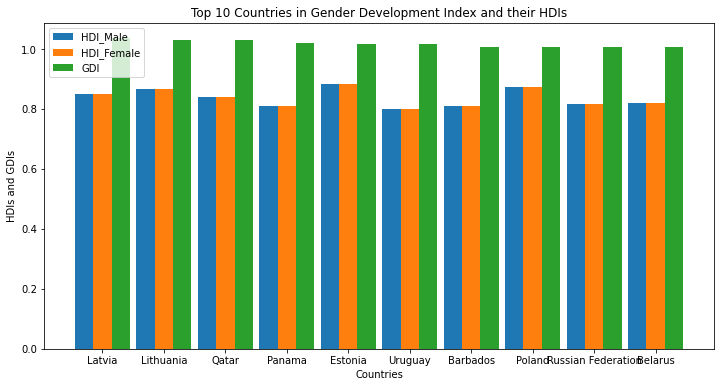

In [75]:
plot_hdi_gdi(df)

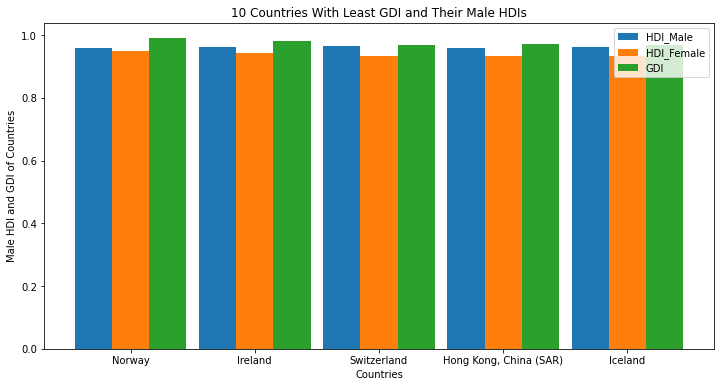

In [45]:
X = df['Country'].head(5)
HDI1 = df['HDI_Male'].head()
HDI2 = df['HDI_Female'].head()

GDI = df['GDI_Value'].head()
plt.figure(figsize=(12,6))
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3,HDI1, 0.3, label = 'HDI_Male')
plt.bar(X_axis - 0.0,HDI2, 0.3, label = 'HDI_Female')
plt.bar(X_axis + 0.3, GDI,0.3, label = 'GDI')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Male HDI and GDI of Countries")
plt.title("10 Countries With Least GDI and Their Male HDIs")
plt.legend()
plt.show()

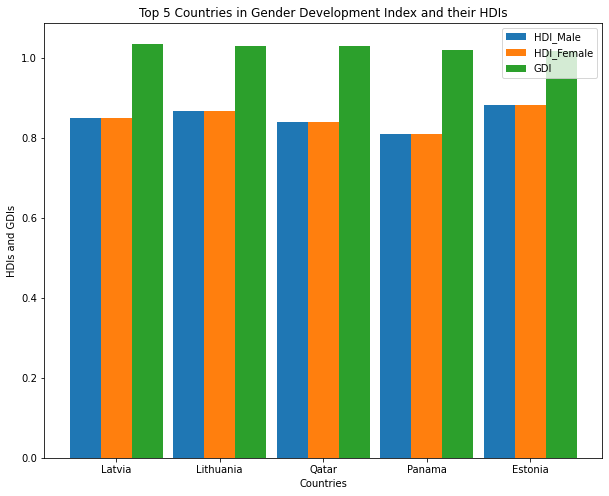

In [46]:
plot_hdi_gdi(df, top=True, num = 5)

In [13]:
df.columns
least5.Life_Expectancy_Female

179    67.8
169    66.4
189    63.6
154    68.3
187    55.7
123    72.7
188    55.5
162    59.1
178    62.1
131    71.0
Name: Life_Expectancy_Female, dtype: float64

In [14]:
df.columns

Index(['HDI_Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Life_Expectancy_Female', 'Life_Expectancy_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

In [15]:
least5.Life_Expectancy_Male

179    64.4
169    63.4
189    61.3
154    66.3
187    52.8
123    68.6
188    51.1
162    56.6
178    60.9
131    68.5
Name: Life_Expectancy_Male, dtype: float64

In [54]:
def plot_hd_indices(df, num=5, top=False):
    query = int(input("Enter 1 for Life Expectancy, 2 for Average Years of Education or 3 for GNI_PC:   "))
    
    if top:
        if top:
            df = df[(df.GDI_Value>=1) & (df.HDI_Male>=0.8)]
            df = df.sort_values(by='GDI_Value', ascending=False).head(num)
            #num = df.shape[0]
            title1 = "highest"
    else:
        df = df.sort_values(by='GDI_Value').head(num)
        title1 = "least"
    X = df['Country']
    
    if query == 1:
        Female = df['Life_Expectancy_Female']

        Male = df['Life_Expectancy_Male']
        title = f"Life Expectancies of {num} Countries with {title1} GDIs"
        ylabel = "Life Expectancies in Years."
    elif query == 2: 
        Female = df['Mean_Yrs_Schooling_Female']

        Male = df['Mean_Yrs_Schooling_Male']
        title = f"Average Years of Education in {num} Countries with {title1} GDIs"
        ylabel = "Average Years of Education"
    else:
        Female = df['GNI_PC_Female']

        Male =  df['GNI_PC_Male']
        title = f"Gross National Income Per Capita of {num} Countries with {title1} GDIs"
        ylabel = "Gross National Income Per Capita in $"
        
    X_axis = np.arange(len(X))
    plt.figure(figsize=(10,6))  
    plt.bar(X_axis - 0.2,Female, 0.4, label = 'Female')
    plt.bar(X_axis + 0.2, Male,0.4, label = ' Male')
  
    plt.xticks(X_axis, X)
    plt.xlabel("Countries")
    plt.ylabel(ylabel)
    plt.title(f"{title} in 2019")
    plt.legend()
    plt.show()


Enter 1 for Life Expectancy, 2 for Average Years of Education or 3 for GNI_PC:   3


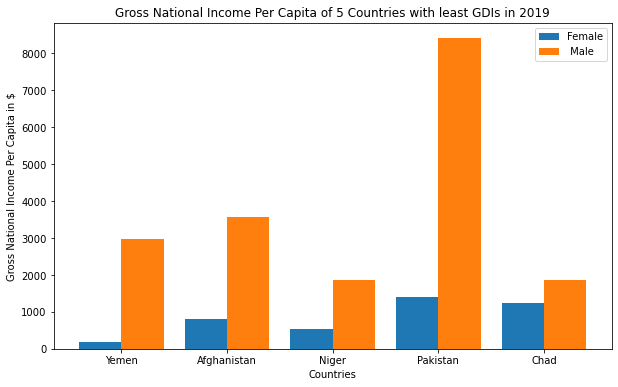

In [57]:
plot_hd_indices(df, num=5, top=False)

In [21]:
top= df[df.GDI_Value>=1]
top

,HDI_Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Life_Expectancy_Female,Life_Expectancy_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
22,22,Slovenia,1.001,1.0,0.916,0.914,84.0,78.6,18.3,16.8,12.6,12.7,33885.0,42312.0
29,29,Estonia,1.017,1.0,0.896,0.882,82.7,74.4,16.8,15.2,13.6,12.7,27086.0,45984.0
34,34,Lithuania,1.030,2.0,0.894,0.868,81.4,70.3,17.1,16.2,13.1,13.0,30987.0,41389.0
35,35,Poland,1.007,1.0,0.880,0.874,82.6,74.8,16.9,15.3,12.5,12.4,24827.0,38850.0
37,37,Latvia,1.036,2.0,0.879,0.849,80.0,70.2,16.8,15.5,13.4,12.6,25758.0,35584.0
45,45,Qatar,1.030,2.0,0.866,0.841,82.0,79.1,14.1,11.3,11.3,9.4,45338.0,107833.0
52,52,Russian Federation,1.007,1.0,0.823,0.817,77.8,67.1,15.3,14.8,11.9,12.1,19694.0,33640.0
53,53,Belarus,1.007,1.0,0.824,0.819,79.6,69.7,15.7,15.2,12.2,12.4,14911.0,22721.0
55,55,Uruguay,1.016,1.0,0.814,0.801,81.5,74.1,17.1,15.1,9.2,8.6,15445.0,25008.0
57,57,Panama,1.019,1.0,0.826,0.811,81.8,75.4,13.5,12.4,11.2,10.0,24050.0,35049.0


#### Question 
**Are all countries with high GDI values have high HDIs?**
#### Answer
Not all the countries with high GDI values have high HDI values. There are at least 10 countries with GDI values more than 0.7 whose HDI values are less than 0.5. This is shown in the diagram below. 


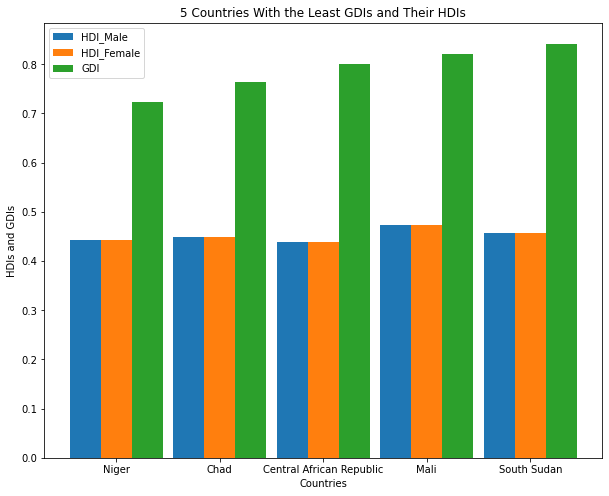

In [66]:
dhl = df[(df.GDI_Value>=0.7) & (df.HDI_Male <= 0.5)]
plot_hdi_gdi(dhl, 5)

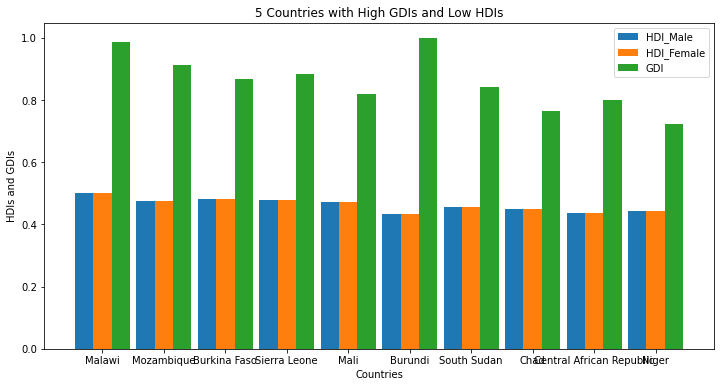

In [76]:
dhl = df[(df.GDI_Value>=0.7) & (df.HDI_Male <= 0.5)]
plot_hdi_gdi(df,num=5 , top=2)